Importing necessary modules

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

reading the dataset

In [4]:
data=pd.read_csv('spam_ham_dataset[1].csv')

In [5]:
data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [10]:
data.groupby('label').describe().T

label                     ham        spam
Unnamed: 0 count  3672.000000  1499.00000
           mean   1835.500000  4421.00000
           std    1060.159422   432.86834
           min       0.000000  3672.00000
           25%     917.750000  4046.50000
           50%    1835.500000  4421.00000
           75%    2753.250000  4795.50000
           max    3671.000000  5170.00000
label_num  count  3672.000000  1499.00000
           mean      0.000000     1.00000
           std       0.000000     0.00000
           min       0.000000     1.00000
           25%       0.000000     1.00000
           50%       0.000000     1.00000
           75%       0.000000     1.00000
           max       0.000000     1.00000

<Axes: xlabel='count', ylabel='label'>

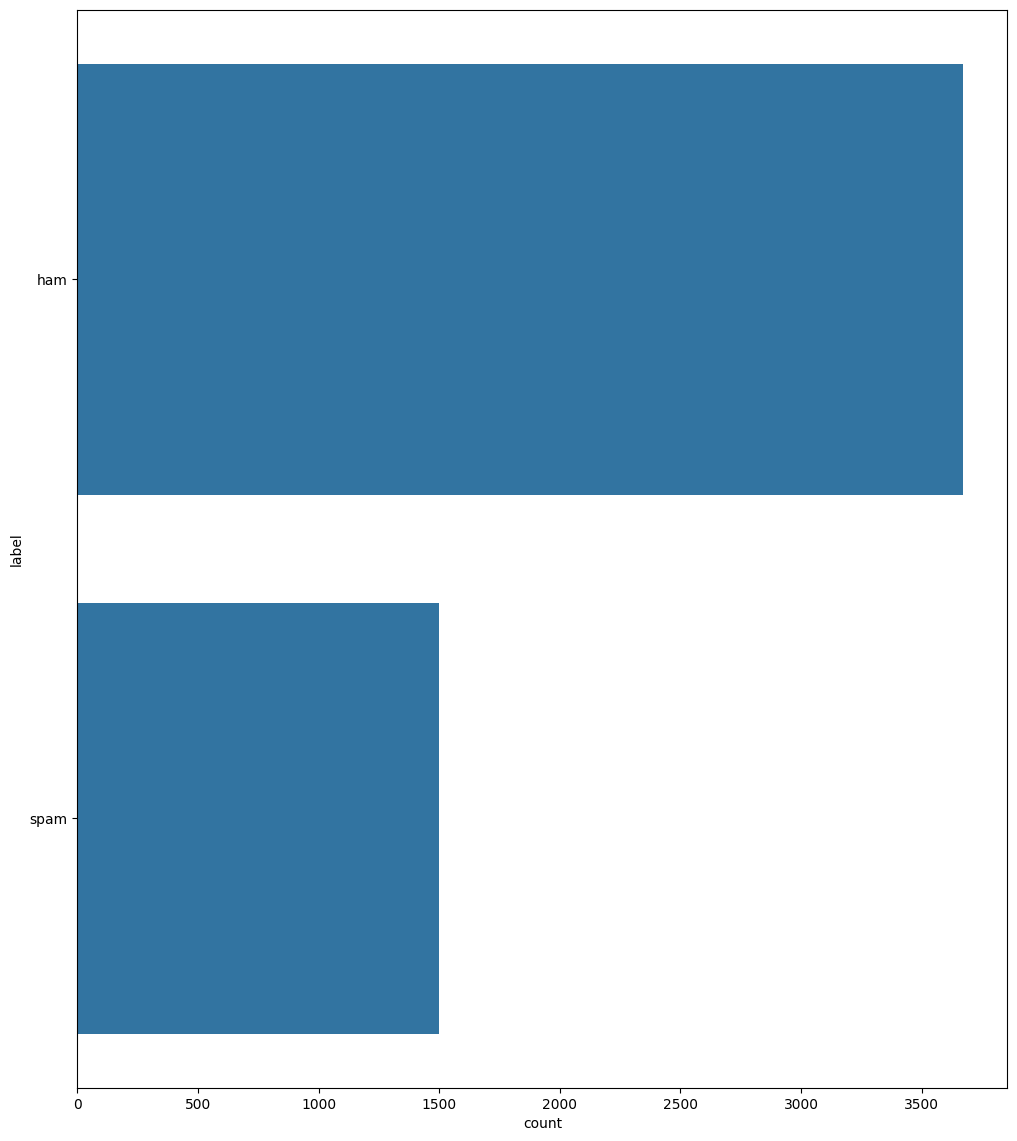

In [11]:
import seaborn as sns
plt.figure(figsize=(12,14))
sns.countplot(data['label'])

As data is imbalanced we need to make it balanced , will use downsample technique here will randomly select ham_msg of lenth equal to spam msg

In [12]:
ham_msg = data[data.label =='ham']
spam_msg = data[data.label=='spam']

In [13]:
ham_msg=ham_msg.sample(n=len(spam_msg),random_state=42)


In [14]:
print(ham_msg.shape,spam_msg.shape)

(1499, 4) (1499, 4)


<ipython-input-15-e7ac00693b44>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)


Text(0.5, 0, 'Message types')

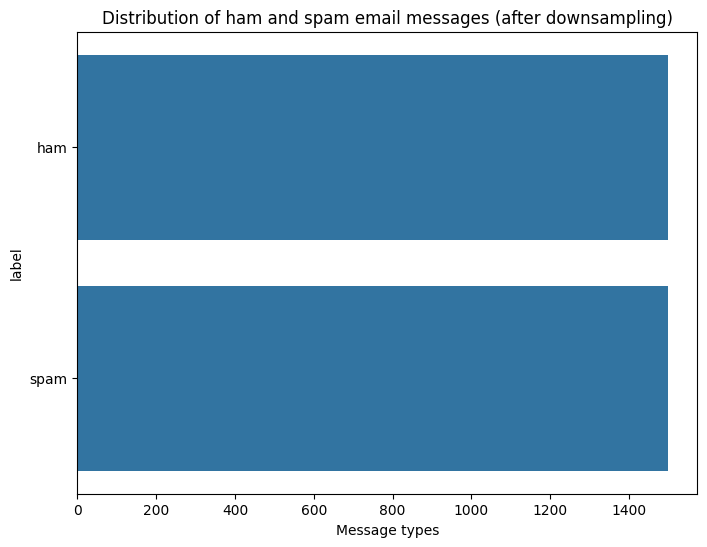

In [15]:
balanced_data=ham_msg.append(spam_msg).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(balanced_data.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [16]:
balanced_data.head()

,Unnamed: 0,label,text,label_num
0,3444,ham,Subject: conoco - big cowboy\r\ndarren :\r\ni ...,0
1,2982,ham,Subject: feb 01 prod : sale to teco gas proces...,0
2,2711,ham,Subject: california energy crisis\r\ncaliforni...,0
3,3116,ham,Subject: re : nom / actual volume for april 23...,0
4,1314,ham,Subject: eastrans nomination changes effective...,0


In [17]:
balanced_data['category']=balanced_data['label'].map({'ham':0,'spam':1})

In [19]:
train_label, test_label, train_category, test_category =train_test_split(balanced_data['label'],balanced_data['category'],test_size=0.2,random_state=434)

In [20]:
vocab_size=500
oov_tok='<OOV>'
max_len=50

preprocessing making tokens out of text

In [21]:
token=Tokenizer(num_words=vocab_size,oov_token=oov_tok)
token.fit_on_texts(train_label)

In [22]:
word_index=token.word_index
word_index

{'<OOV>': 1, 'spam': 2, 'ham': 3}

In [23]:
padding_type='post'
truncate_type='post'
Trainning_seq=token.texts_to_sequences(train_label)
Trainning_pad=pad_sequences(Trainning_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

In [24]:
Testing_seq=token.texts_to_sequences(test_label)
Testing_pad=pad_sequences(Testing_seq,maxlen=50,padding=padding_type,truncating=truncate_type)

# Preparing Model

In [25]:
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(vocab_size,16,input_length=50),
                                  tf.keras.layers.GlobalAveragePooling1D(),
                                  tf.keras.layers.Dense(32,activation='relu'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(1,activation='sigmoid')])

In [26]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),metrics=['accuracy'],optimizer='adam')

In [28]:
epoch=30
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history=model.fit(Trainning_pad, train_category ,validation_data=(Testing_pad, test_category),epochs=epoch,callbacks=[early_stop],verbose=2)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


75/75 - 2s - loss: 0.6926 - accuracy: 0.5092 - val_loss: 0.6913 - val_accuracy: 0.4983 - 2s/epoch - 21ms/step
Epoch 2/30
75/75 - 0s - loss: 0.6889 - accuracy: 0.6243 - val_loss: 0.6842 - val_accuracy: 1.0000 - 166ms/epoch - 2ms/step
Epoch 3/30
75/75 - 0s - loss: 0.6732 - accuracy: 0.7193 - val_loss: 0.6564 - val_accuracy: 1.0000 - 175ms/epoch - 2ms/step
Epoch 4/30
75/75 - 0s - loss: 0.6218 - accuracy: 0.9475 - val_loss: 0.5746 - val_accuracy: 1.0000 - 164ms/epoch - 2ms/step
Epoch 5/30
75/75 - 0s - loss: 0.5123 - accuracy: 0.9979 - val_loss: 0.4372 - val_accuracy: 1.0000 - 216ms/epoch - 3ms/step
Epoch 6/30
75/75 - 0s - loss: 0.3606 - accuracy: 1.0000 - val_loss: 0.2787 - val_accuracy: 1.0000 - 208ms/epoch - 3ms/step
Epoch 7/30
75/75 - 0s - loss: 0.2233 - accuracy: 1.0000 - val_loss: 0.1563 - val_accuracy: 1.0000 - 175ms/epoch - 2ms/step
Epoch 8/30
75/75 - 0s - loss: 0.1319 - accuracy: 1.0000 - val_loss: 0.0882 - val_accuracy: 1.0000 - 201ms/epoch - 3ms/step
Epoch 9/30
75/75 - 0s - loss:

In [29]:
model.evaluate(Testing_pad, test_category)

19/19 [==============================] - 0s 2ms/step - loss: 5.4358e-04 - accuracy: 1.0000


[0.0005435766652226448, 1.0]

Text(0.5, 0, 'epoch')

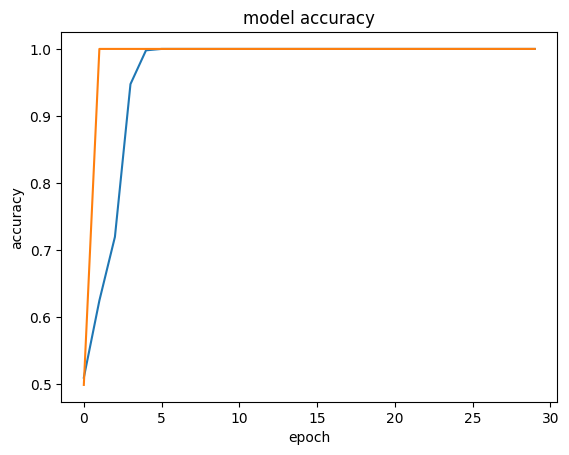

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [31]:
predict_msg = ["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",
          "Ok lar... Joking wif u oni...",
          "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]

In [32]:
def predict_spam(predict_msg):
    new_seq = token.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =50,
                      padding = padding_type,
                      truncating='post')
    return (model.predict(padded))
predict_spam(predict_msg)

1/1 [==============================] - 0s 358ms/step


array([[0.13262236],
       [0.37838805],
       [0.04916506]], dtype=float32)